In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [10]:
# load Data
data = np.load("avgs.npy")
# data = data[:10000]

# Convert the data into features (X) and target (y)
# We will use the previous 3 time steps to predict the next time step

def create_features(data, window_size=3):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])  # Use the previous `window_size` points as features
        y.append(data[i + window_size])  # Predict the value at the next time step
    return np.array(X), np.array(y)

window_size = 3
X, y = create_features(data, window_size)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [11]:
# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8.291626463123354e-09


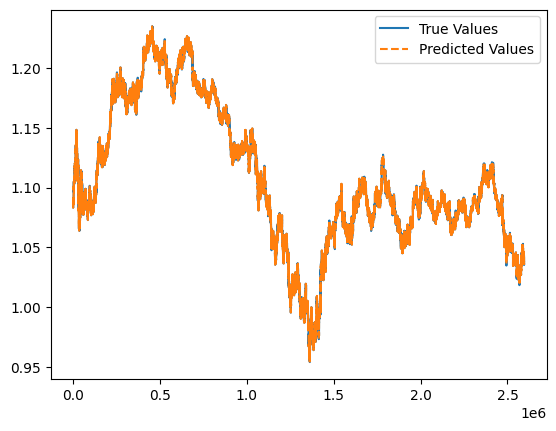

In [12]:
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values', linestyle='--')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True vs. Predicted Values')
plt.show()

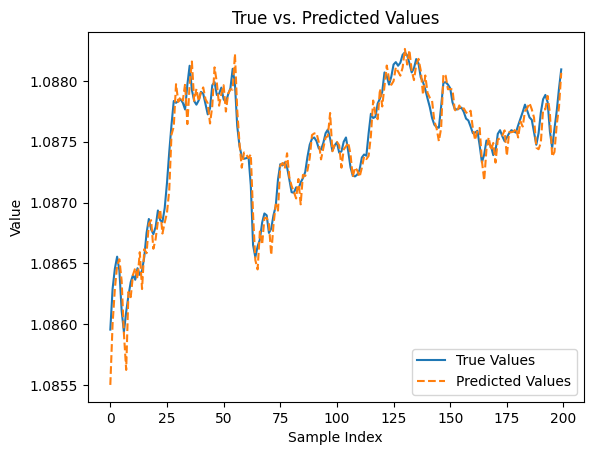

In [30]:
plt.plot(y_test[200:400], label='True Values')
plt.plot(y_pred[200:400], label='Predicted Values', linestyle='--')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True vs. Predicted Values')
plt.show()

# ***Normalization***

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best n_neighbors: {grid_search.best_params_["n_neighbors"]}')

Best n_neighbors: 5


In [33]:
# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=grid_search.best_params_["n_neighbors"])

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7.50812932855064e-09


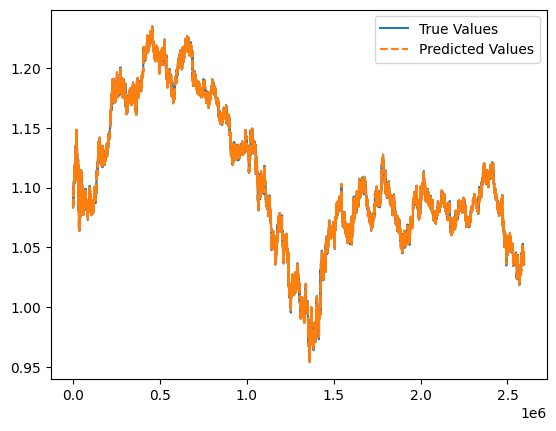

In [34]:
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values', linestyle='--')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True vs. Predicted Values')
plt.show()

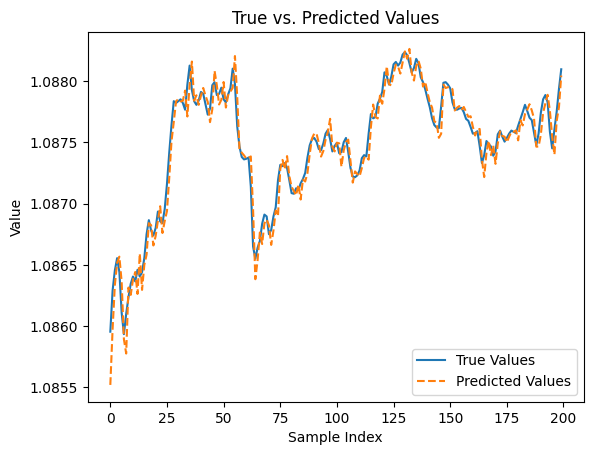

In [35]:
plt.plot(y_test[200:400], label='True Values')
plt.plot(y_pred[200:400], label='Predicted Values', linestyle='--')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True vs. Predicted Values')
plt.show()